# Bias mitigator for UCI Adult dataset

## Dependencies

In [1]:
import sys

sys.path.append('../')

In [2]:
DATA_PATH = './data/'
PLOTS_PATH = './plots/'

## Data processing

In [3]:
from src.data.datasets import fetch_openml_dataset

In [4]:
uci_adult = fetch_openml_dataset("UCIadult", "sex")

## Classification

In [5]:
from src.models.sklearn_estimators import SklearnClfs
from sklearn.linear_model import LogisticRegression
from src.eval.fairness import eval_binary_clf_fairness
from src.data.plotlib import plot_binary_fairness_metrics_by_group

<Figure size 1800x1800 with 0 Axes>

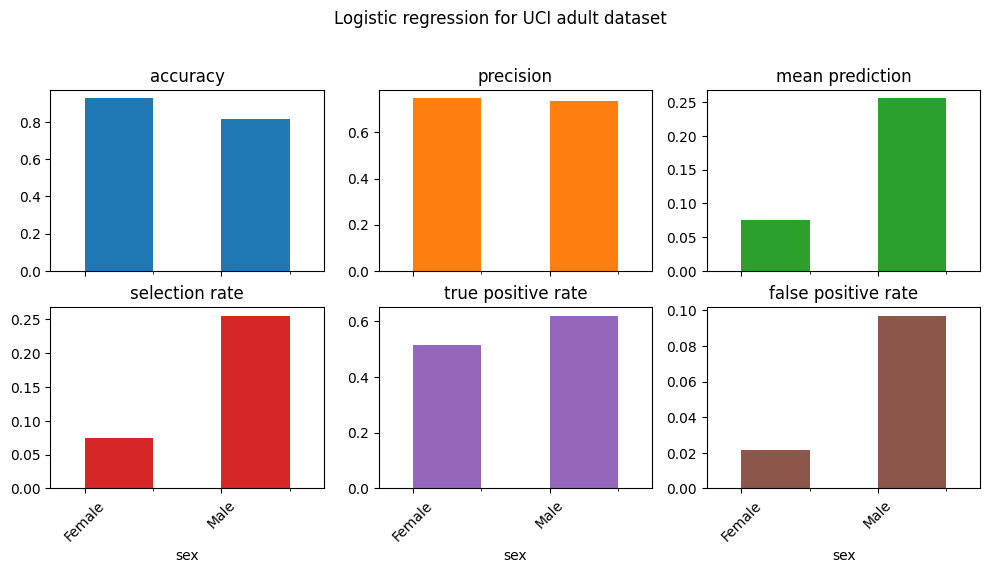

In [6]:
sklearn_clfs = {
    "Logistic regression": LogisticRegression(max_iter=1000)
}

sklearn_clfs_obj = SklearnClfs(sklearn_clfs)
sklearn_clfs_obj.fit_clf_all(uci_adult["features"], uci_adult["labels"])

pred_uci_adult_dict_raw = sklearn_clfs_obj.predict_all(uci_adult["features"])

metrics_raw = {}
for clf_type in sklearn_clfs_obj.get_clf_all():
    metric_frame = eval_binary_clf_fairness(uci_adult["labels"],
                                            pred_uci_adult_dict_raw[clf_type],
                                            uci_adult["sensitive"])
    metrics_raw[clf_type] = metric_frame

xticks = ["Female", "Male"]
for clf_type in metrics_raw:
    plot_binary_fairness_metrics_by_group(metrics_raw[clf_type],
                                          xticks,
                                          clf_type + " for UCI adult dataset",
                                          ["accuracy", "precision", "mean prediction", 
                                           "selection rate", "true positive rate", "false positive rate"],
                                          PLOTS_PATH)

In [7]:
metrics_raw["Logistic regression"].overall

accuracy                                                          0.853528
precision                                                         0.737106
confusion matrix                             [[34642, 2513], [4641, 7046]]
classification report    {'0': {'precision': 0.8818572919583535, 'recal...
count                                                                48842
mean prediction                                                   0.195713
selection rate                                                    0.195713
false negative rate                                               0.397108
false positive rate                                               0.067636
true negative rate                                                0.932364
true positive rate                                                0.602892
dtype: object

In [8]:
metrics_raw["Logistic regression"].by_group

,accuracy,precision,confusion matrix,classification report,count,mean prediction,selection rate,false negative rate,false positive rate,true negative rate,true positive rate
sex,,,,,,,,,,,
Female,0.927866,0.747325,"[[14116, 307], [861, 908]]","{'0': {'precision': 0.942511851505642, 'recall...",16192,0.075037,0.075037,0.486716,0.021285,0.978715,0.513284
Male,0.816662,0.735618,"[[20526, 2206], [3780, 6138]]","{'0': {'precision': 0.8444828437422859, 'recal...",32650,0.255559,0.255559,0.381125,0.097044,0.902956,0.618875


## Exponentiated gradient

In [9]:
from src.models.fairlearn_mitigators import ExpGradMitigator
from fairlearn.reductions import DemographicParity

<Figure size 1800x1800 with 0 Axes>

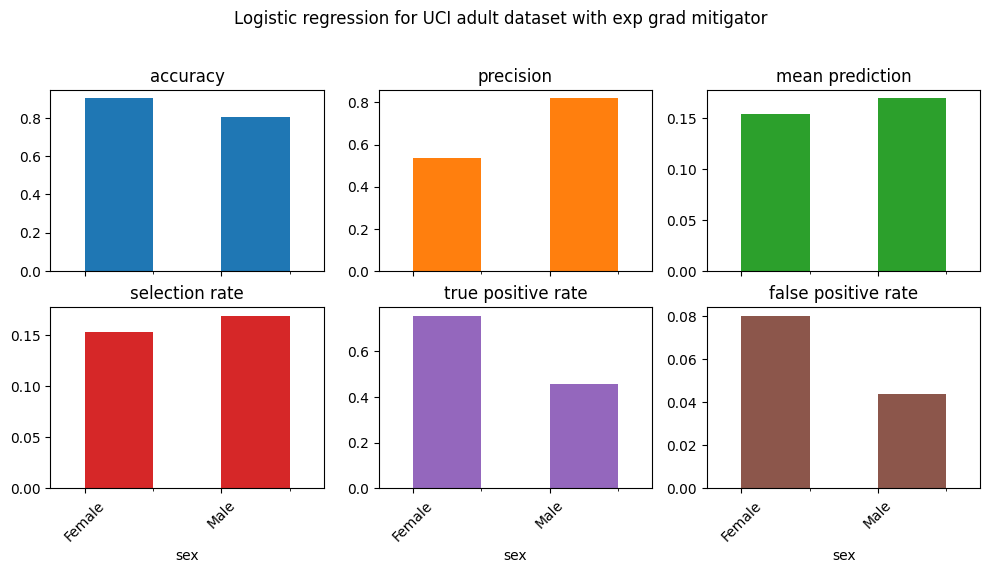

In [14]:
constraint = DemographicParity()

exp_grad_mitigator = ExpGradMitigator(sklearn_clfs, constraint)
exp_grad_mitigator.fit_mitigator_all(uci_adult["features"], uci_adult["labels"], uci_adult["sensitive"])

pred_uci_adult_dict_exp_grad = exp_grad_mitigator.predict_all(uci_adult["features"])

metrics_exp_grad = {}
for clf_type in exp_grad_mitigator.get_mitigator_all():
    metric_frame = eval_binary_clf_fairness(uci_adult["labels"],
                                            pred_uci_adult_dict_exp_grad[clf_type],
                                            uci_adult["sensitive"])
    metrics_exp_grad[clf_type] = metric_frame

for clf_type in metrics_exp_grad:
    plot_binary_fairness_metrics_by_group(metrics_exp_grad[clf_type],
                                          xticks,
                                          clf_type + " for UCI adult dataset with exp grad mitigator",
                                          ["accuracy", "precision", "mean prediction", 
                                           "selection rate", "true positive rate", "false positive rate"],
                                          PLOTS_PATH)

In [11]:
metrics_exp_grad["Logistic regression"].overall

accuracy                                                          0.836698
precision                                                         0.731446
confusion matrix                             [[35002, 2153], [5823, 5864]]
classification report    {'0': {'precision': 0.85736680955297, 'recall'...
count                                                                48842
mean prediction                                                   0.164142
selection rate                                                    0.164142
false negative rate                                               0.498246
false positive rate                                               0.057946
true negative rate                                                0.942054
true positive rate                                                0.501754
dtype: object

In [13]:
metrics_exp_grad["Logistic regression"].by_group

,accuracy,precision,confusion matrix,classification report,count,mean prediction,selection rate,false negative rate,false positive rate,true negative rate,true positive rate
sex,,,,,,,,,,,
Female,0.901927,0.536360,"[[13269, 1154], [434, 1335]]","{'0': {'precision': 0.9683281033350362, 'recal...",16192,0.153718,0.153718,0.245336,0.080011,0.919989,0.754664
Male,0.804349,0.819284,"[[21733, 999], [5389, 4529]]","{'0': {'precision': 0.8013052134798319, 'recal...",32650,0.169311,0.169311,0.543356,0.043947,0.956053,0.456644


In [15]:
metrics_raw["Logistic regression"].by_group

,accuracy,precision,confusion matrix,classification report,count,mean prediction,selection rate,false negative rate,false positive rate,true negative rate,true positive rate
sex,,,,,,,,,,,
Female,0.927866,0.747325,"[[14116, 307], [861, 908]]","{'0': {'precision': 0.942511851505642, 'recall...",16192,0.075037,0.075037,0.486716,0.021285,0.978715,0.513284
Male,0.816662,0.735618,"[[20526, 2206], [3780, 6138]]","{'0': {'precision': 0.8444828437422859, 'recal...",32650,0.255559,0.255559,0.381125,0.097044,0.902956,0.618875
